## Lecture 4

### Pandas

In the previous lecture we saw the package `numpy`. `numpy` is fantastic for dealing with numerical data.

`pandas` is a package for dealing with *structured* data of mixed type. A common form of *structured data* is tabular, or spreadsheet data, where each column stores a different type of data (e.g. strings, dates, numerical values).

Rule of thumb: Whenever you reach for an Excel spreadsheet, you should strongly consider using `pandas` instead!

Let's get started with some data!

This example is adapted from Wes McKinney's excellent book "Python for Data Analysis"

MovieLens Latest Data - 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. 

https://grouplens.org/datasets/movielens/

In [1]:
%%sh
wget http://files.grouplens.org/datasets/movielens/ml-1m.zip

--2022-10-17 12:51:31--  http://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

     0K .......... .......... .......... .......... ..........  0%  247K 23s
    50K .......... .......... .......... .......... ..........  1%  450K 18s
   100K .......... .......... .......... .......... ..........  2% 2.07M 13s
   150K .......... .......... .......... .......... ..........  3% 2.39M 10s
   200K .......... .......... .......... .......... ..........  4%  580K 10s
   250K .......... .......... .......... .......... ..........  5% 2.60M 8s
   300K .......... .......... .......... .......... ..........  6% 2.45M 7s
   350K .......... .......... .......... .......... ..........  6% 1.95M 7s
   400K .......... .......... .....

In [2]:
import zipfile
with zipfile.ZipFile("ml-1m.zip","r") as f:
    f.extractall(".")

In [3]:
%ls

01_getting_up_and_running.ipynb  05_pandas.ipynb             ml-1m/
02_some_basics.ipynb             06_writing_robust_code.txt  ml-1m.zip
03_numpy.ipynb                   07_classes.ipynb
04_plotting.txt                  Untitled.ipynb


In [4]:
%cd ml-1m/

/opt/notebooks/notebooks/ml-1m


In [5]:
%ls

README  ml-1m.zip  movies.dat  ratings.dat  users.dat


Let's read in the data from the `ratings.dat` file. pandas has tools that make reading data from CSV (comma-seperated value) files straightforward.

In [6]:
import pandas as pd
import numpy as np
ratings_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv("ratings.dat", sep='::', header=None, engine='python', names=ratings_names)
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [7]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
users_names = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv("users.dat", sep='::', header=None, engine='python', names=users_names)
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [9]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


* *Exercise*. Look in the `README` file. Understand the columns in the `movies.dat` file. Read the file into a variables `movies`.

In [10]:
movies_names = ['movie_id', 'title', 'genres']
movies = pd.read_csv("movies.dat", sep='::', engine="python", header=None, names=movies_names, encoding="latin_1")

In [11]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Things to note:

* Each rating is tied to a single user by the `user_id`.
* Each rating is tied to a single movie by the `movie_id`.

We can use the `pandas.merge` function to join these seperate dataframes together.

*Important:* The merge is specified automatically by matching shared labels between the dataframes. `movie_id` and `Movie_id` will not match!

In [12]:
data = pd.merge(pd.merge(ratings, users), movies)

In [13]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


## Slicing and selecting data

pandas supports similar slicing and boolean operations on data as numpy.

Select the first 5 rows of the `gender` column.

In [14]:
data["gender"][:5]

0    F
1    M
2    M
3    M
4    M
Name: gender, dtype: object

Select all ratings from user number 3663.

In [15]:
data[data["user_id"] == 3663]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
8641,3663,1287,4,966410744,F,35,9,17055,Ben-Hur (1959),Action|Adventure|Drama
32102,3663,1721,5,966410583,F,35,9,17055,Titanic (1997),Drama|Romance
48559,3663,260,3,966410744,F,35,9,17055,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
64046,3663,648,5,966411209,F,35,9,17055,Mission: Impossible (1996),Action|Adventure|Mystery
69483,3663,2916,4,966410942,F,35,9,17055,Total Recall (1990),Action|Adventure|Sci-Fi|Thriller
...,...,...,...,...,...,...,...,...,...,...
870595,3663,2468,3,966411433,F,35,9,17055,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller
875803,3663,3404,1,966411003,F,35,9,17055,Titanic (1953),Action|Drama
877812,3663,170,4,966411096,F,35,9,17055,Hackers (1995),Action|Crime|Thriller
916857,3663,2457,5,966410898,F,35,9,17055,Running Scared (1986),Action|Comedy


* *Exercise*: Select all ratings made by women.

In [16]:
data[data["gender"] == "F"]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
19,59,1193,4,977934292,F,50,1,55413,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000199,5334,3382,5,960796159,F,56,13,46140,Song of Freedom (1936),Drama
1000200,5420,1843,3,960156505,F,1,19,14850,Slappy and the Stinkers (1998),Children's|Comedy
1000201,5433,286,3,960240881,F,35,17,45014,Nemesis 2: Nebula (1995),Action|Sci-Fi|Thriller
1000202,5494,3530,4,959816296,F,35,17,94306,Smoking/No Smoking (1993),Comedy


* *Exercise*: Select all *movies* that are of genres *Drama*.
  * Hint: Try the `.str.contains()` method.

In [17]:
movies[movies['genres'].str.contains('Drama')][:20]

,movie_id,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Drama|Thriller
16,17,Sense and Sensibility (1995),Drama|Romance
20,21,Get Shorty (1995),Action|Comedy|Drama
21,22,Copycat (1995),Crime|Drama|Thriller
23,24,Powder (1995),Drama|Sci-Fi
24,25,Leaving Las Vegas (1995),Drama|Romance
25,26,Othello (1995),Drama


* *Exercise*: Select all *movies* that are of *only* of genres *Drama*.
  * Hint: Use boolean selection.

In [18]:
movies[movies['genres'] == "Drama"]

,movie_id,title,genres
13,14,Nixon (1995),Drama
25,26,Othello (1995),Drama
26,27,Now and Then (1995),Drama
29,30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Drama
30,31,Dangerous Minds (1995),Drama
...,...,...,...
3845,3915,Girlfight (2000),Drama
3846,3916,Remember the Titans (2000),Drama
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama


## Grouping data

Sometimes it is useful to *group* data together by some common element. For example, say we want to group all of the ratings by title and count how many ratings there are for each title.

In [19]:
num_ratings_by_title = data.groupby('title').size().sort_values()
num_ratings_by_title

title
Another Man's Poison (1952)                                 1
Night Tide (1961)                                           1
Shadows (Cienie) (1988)                                     1
McCullochs, The (1975)                                      1
Anna (1996)                                                 1
                                                         ... 
Jurassic Park (1993)                                     2672
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode IV - A New Hope (1977)                2991
American Beauty (1999)                                   3428
Length: 3706, dtype: int64

In [20]:
num_ratings_by_title.sort_values(ascending=False)[:10]

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64

*Exercise*: Show the user ids of the top 100 users who rated the most movies. Assign the result to `users_with_time`.
Tips: Use `groupby`, `sort_values`, `size`, slicing on `data`. Try writing it in one line!

(array([2.202e+03, 1.267e+03, 7.590e+02, 2.630e+02, 2.510e+02, 2.010e+02,
        1.860e+02, 1.190e+02, 1.270e+02, 1.660e+02, 1.100e+02, 8.700e+01,
        5.600e+01, 2.900e+01, 8.700e+01, 2.600e+01, 5.100e+01, 6.000e+00,
        1.100e+01, 2.000e+01, 1.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 5.000e+00]),
 array([  20. ,   60.2,  100.4,  140.6,  180.8,  221. ,  261.2,  301.4,
         341.6,  381.8,  422. ,  462.2,  502.4,  542.6,  582.8,  623. ,
         663.2,  703.4,  743.6,  783.8,  824. ,  864.2,  904.4,  944.6,
         984.8, 1025. , 1065.2, 1105.4, 1145.6, 1185.8, 1226. ]),
 <BarContainer object of 30 artists>)

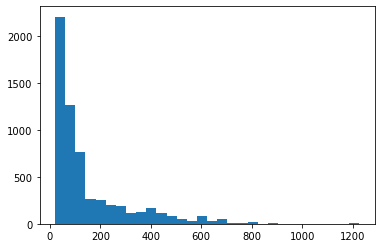

In [21]:
users_ids_with_time = data.groupby('user_id').size().sort_values(ascending=False)[:100]

import matplotlib.pyplot as plt
users_num_ratings = data.groupby('user_id').size()[data.groupby('user_id').size()]
plt.hist(users_num_ratings.values, bins=30)

Let's find out about these people who can watch so many movies! What jobs do they have?

First of all, the original table only contains numbers which *map* to occupations. It would be nice to have the occupations rather than the numbers.

In [22]:
number_to_occupation = {0:  "other or not specified",
1: "academic/educator",
2: "artist",
3: "clerical/admin",
4: "college/grad student",
5: "customer service",
6: "doctor/health care",
7: "executive/managerial",
8: "farmer",
9: "homemaker",
10: "K-12 student",
11: "lawyer",
12: "programmer",
13: "retired",
14: "sales/marketing",
15: "scientist",
16: "self-employed",
17: "technician/engineer",
18: "tradesman/craftsman",
19: "unemployed",
20: "writer"}

In [23]:
users['occupation'] = users['occupation'].map(number_to_occupation)
users

,user_id,gender,age,occupation,zip
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive/managerial,02460
4,5,M,25,writer,55455
...,...,...,...,...,...
6035,6036,F,25,scientist,32603
6036,6037,F,45,academic/educator,76006
6037,6038,F,56,academic/educator,14706
6038,6039,F,45,other or not specified,01060


In [24]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive/managerial,02460
4,5,M,25,writer,55455


      user_id gender  age              occupation    zip
351       352      M   18    college/grad student  60115
423       424      M   25     technician/engineer  55112
523       524      M   18  other or not specified  91320
530       531      F   18         sales/marketing  22206
548       549      M   25      doctor/health care  53217
...       ...    ...  ...                     ...    ...
5811     5812      F   25    executive/managerial  92120
5830     5831      M   25       academic/educator  92120
5953     5954      M   45                  lawyer  70802
6015     6016      M   45       academic/educator  37209
6035     6036      F   25               scientist  32603

[100 rows x 5 columns]


<AxesSubplot:title={'center':'Occupations of top 100 users with most ratings'}>

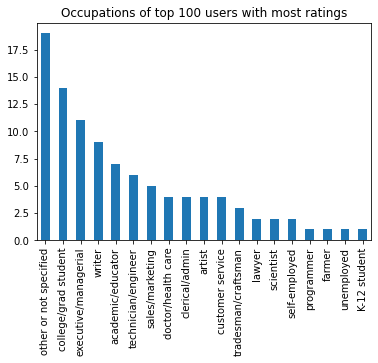

In [25]:
# Simplify into multiple steps
users_with_time = users[users["user_id"].isin(users_ids_with_time.index)]
print(users_with_time)
(users_with_time['occupation'].value_counts()).plot(kind='bar', title="Occupations of top 100 users with most ratings")

* *Exercise*: Perform a similar analysis, but look at whether there are more male or female users in the top 100. Generate a plot.
  * Hint: Start with `users_with_time`. Use `value_counts`. Use the `.plot()` method.

In [26]:
users_with_time.head()

,user_id,gender,age,occupation,zip
351,352,M,18,college/grad student,60115
423,424,M,25,technician/engineer,55112
523,524,M,18,other or not specified,91320
530,531,F,18,sales/marketing,22206
548,549,M,25,doctor/health care,53217


In [27]:
count_gender_of_users_with_time = users_with_time["gender"].value_counts()
print(count_gender_of_users_with_time)

M    80
F    20
Name: gender, dtype: int64


<AxesSubplot:>

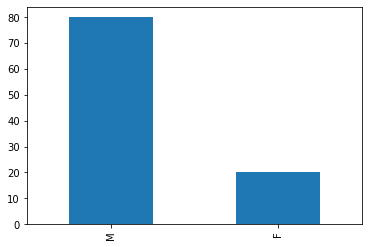

In [28]:
count_gender_of_users_with_time.plot(kind='bar')

## Pivot tables

'Pivot tables' are a concept popularised by Microsoft Excel. 
They are a tool for:
* first *aggregating* data by one or more *keys*, 
* and then arranging the data with some of the *keys* along the rows, and some along the columns.

Question: What is the mean movie rating for each film grouped by gender?

In [29]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [30]:
mean_rating = data.pivot_table('rating', index='title', columns='gender', aggfunc=np.mean)
mean_rating.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


* Exercise: Using the `.pivot_table()` method, compute the mean and standard deviation of the aggregated data.
  * Hint: Look at the documentation for the `aggfunc` argument to `pd.pivot_table` using the `?` command.
  * Hint: Find functions in `numpy` (`np`) that compute the mean and standard deviation.
  

In [31]:
pd.pivot_table?

Signature:
pd.pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'str' = 'All',
    observed: 'bool' = False,
    sort: 'bool' = True,
) -> 'DataFrame'
Docstring:
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects
(hierarchical indexes) on the index and columns of the result DataFrame.

Parameters
----------
data : DataFrame
values : column to aggregate, optional
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or list of the previous
    If an array is pa

In [32]:
mean_rating = data.pivot_table('rating', index='title', 
                               columns='gender', 
                               aggfunc=[len, np.mean, np.std])
mean_rating
mean_rating["mean"]["F"].sort_values(ascending=False)

title
Clean Slate (Coup de Torchon) (1981)                 5.0
Ballad of Narayama, The (Narayama Bushiko) (1958)    5.0
Raw Deal (1948)                                      5.0
Bittersweet Motel (2000)                             5.0
Skipped Parts (2000)                                 5.0
                                                    ... 
With Friends Like These... (1998)                    NaN
Wooden Man's Bride, The (Wu Kui) (1994)              NaN
Year of the Horse (1997)                             NaN
Zachariah (1971)                                     NaN
Zero Kelvin (Kjærlighetens kjøtere) (1995)           NaN
Name: F, Length: 3706, dtype: float64

## Analysis - Getting answers to questions

Question:

1. Which films were most divisive between male and female viewers?

In [33]:
mean_rating.head()

len             mean                 std  \
gender                            F      M         F         M         F   
title                                                                      
$1,000,000 Duck (1971)         16.0   21.0  3.375000  2.761905  0.957427   
'Night Mother (1986)           36.0   34.0  3.388889  3.352941  1.021981   
'Til There Was You (1997)      37.0   15.0  2.675676  2.733333  0.973369   
'burbs, The (1989)             92.0  211.0  2.793478  2.962085  1.124532   
...And Justice for All (1979)  35.0  164.0  3.828571  3.689024  0.954424   

                                         
gender                                M  
title                                    
$1,000,000 Duck (1971)         1.135991  
'Night Mother (1986)           1.228015  
'Til There Was You (1997)      1.162919  
'burbs, The (1989)             1.099127  
...And Justice for All (1979)  0.862086

In [34]:
mean_rating["mean_diff"] = np.abs(mean_rating["mean"]["M"] - mean_rating["mean"]["F"])

In [35]:
sorted_by_diff = mean_rating.sort_values(by="mean_diff", ascending=False)

In [36]:
sorted_by_diff[:15]

len            mean  \
gender                                                F     M         F   
title                                                                     
Tigrero: A Film That Was Never Made (1994)          1.0   3.0  1.000000   
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...  2.0   2.0  4.000000   
Neon Bible, The (1995)                              1.0   1.0  1.000000   
James Dean Story, The (1957)                        2.0   1.0  4.000000   
Country Life (1994)                                 1.0   2.0  5.000000   
Enfer, L' (1994)                                    1.0   4.0  1.000000   
Babyfever (1994)                                    3.0   1.0  3.666667   
Stalingrad (1993)                                   1.0  32.0  1.000000   
Woman of Paris, A (1923)                            1.0   7.0  5.000000   
Cobra (1925)                                        1.0   4.0  4.000000   
Killer: A Journal of Murder (1995)                  1.0   7.0  1.000000   
Rosie (1998)                                        1.0   3.0  1.000000   
Dangerous Ground (1997)                             1.0   3.0  1.000000   
In God's Hands (1998)                               2.0   3.0  1.000000   
Flying Saucer, The (1950)                           1.0  10.0  1.000000   

                                                                   std  \
gender                                                     M         F   
title                                                                    
Tigrero: A Film That Was Never Made (1994)          4.333333       NaN   
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...  1.000000  1.414214   
Neon Bible, The (1995)                              4.000000       NaN   
James Dean Story, The (1957)                        1.000000  0.000000   
Country Life (1994)                                 2.000000       NaN   
Enfer, L' (1994)                                    3.750000       NaN   
Babyfever (1994)                                    1.000000  0.577350   
Stalingrad (1993)                                   3.593750       NaN   
Woman of Paris, A (1923)                            2.428571       NaN   
Cobra (1925)                                        1.500000       NaN   
Killer: A Journal of Murder (1995)                  3.428571       NaN   
Rosie (1998)                                        3.333333       NaN   
Dangerous Ground (1997)                             3.333333       NaN   
In God's Hands (1998)                               3.333333  0.000000   
Flying Saucer, The (1950)                           3.300000       NaN   

                                                             mean_diff  
gender                                                     M            
title                                                                   
Tigrero: A Film That Was Never Made (1994)          0.577350  3.333333  
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...  0.000000  3.000000  
Neon Bible, The (1995)                                   NaN  3.000000  
James Dean Story, The (1957)                             NaN  3.000000  
Country Life (1994)                                 0.000000  3.000000  
Enfer, L' (1994)                                    0.500000  2.750000  
Babyfever (1994)                                         NaN  2.666667  
Stalingrad (1993)                                   0.874712  2.593750  
Woman of Paris, A (1923)                            1.272418  2.571429  
Cobra (1925)                                        1.000000  2.500000  
Killer: A Journal of Murder (1995)                  1.397276  2.428571  
Rosie (1998)                                        2.081666  2.333333  
Dangerous Ground (1997)                             1.527525  2.333333  
In God's Hands (1998)                               2.081666  2.333333  
Flying Saucer, The (1950)                           1.159502  2.300000

*Exercise:* Take a look at the data in the above table. What is the statistical issue with what we have done?

Answer: Some movies only have one or two ratings! They are not statistically significant. Let's remove movies with only a few ratings.

In [37]:
ratings_by_title = data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [38]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
print(active_titles)

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)


In [39]:
mean_rating = mean_rating.loc[active_titles]
mean_rating
mean_rating["mean_diff"] = np.abs(mean_rating["mean"]["M"] - mean_rating["mean"]["F"])

In [40]:
sorted_by_mean_diff = mean_rating.sort_values(by="mean_diff")[::-1]
sorted_by_mean_diff

len             mean            \
gender                                      F      M         F         M   
title                                                                      
Dirty Dancing (1987)                    291.0  396.0  3.790378  2.959596   
Good, The Bad and The Ugly, The (1966)   99.0  723.0  3.494949  4.221300   
Kentucky Fried Movie, The (1977)         33.0  272.0  2.878788  3.555147   
Jumpin' Jack Flash (1986)               106.0  268.0  3.254717  2.578358   
Dumb & Dumber (1994)                    149.0  511.0  2.697987  3.336595   
...                                       ...    ...       ...       ...   
Robin Hood: Prince of Thieves (1991)     93.0  251.0  3.161290  3.163347   
Trainspotting (1996)                    195.0  556.0  3.958974  3.960432   
Jerry Maguire (1996)                    451.0  902.0  3.758315  3.759424   
Mystery, Alaska (1999)                   69.0  218.0  3.434783  3.435780   
Tender Mercies (1983)                    74.0  190.0  3.905405  3.905263   

                                             std           mean_diff  
gender                                         F         M            
title                                                                 
Dirty Dancing (1987)                    1.105181  1.087738  0.830782  
Good, The Bad and The Ugly, The (1966)  1.146189  0.814168  0.726351  
Kentucky Fried Movie, The (1977)        1.023400  1.007669  0.676359  
Jumpin' Jack Flash (1986)               1.078459  1.134007  0.676359  
Dumb & Dumber (1994)                    1.354196  1.277333  0.638608  
...                                          ...       ...       ...  
Robin Hood: Prince of Thieves (1991)    1.106211  0.996600  0.002056  
Trainspotting (1996)                    1.039607  1.016202  0.001457  
Jerry Maguire (1996)                    0.912453  0.910413  0.001109  
Mystery, Alaska (1999)                  1.021508  0.934739  0.000997  
Tender Mercies (1983)                   0.981597  0.971266  0.000142  

[1216 rows x 7 columns]

*Exercise*: Which 20 films had the widest difference of opinion?
  * a) amongst males.
  * b) amongst females.
  * c) amongst people.
 
Tips: Start with `mean_rating`. Select the standard deviation column using `["std"]`. Use `.sort_values` with the `by` keyword argument. Reverse using `[start:stop:slice]`.

In [41]:
mean_rating["std"].sort_values(by="M")[-1::-1]

gender,F,M
title,,
"Blair Witch Project, The (1999)",1.313929,1.317775
Natural Born Killers (1994),1.355926,1.298487
Dumb & Dumber (1994),1.354196,1.277333
Tank Girl (1995),1.300054,1.264366
Serial Mom (1994),1.125951,1.257872
...,...,...
Raiders of the Lost Ark (1981),0.792796,0.699111
Rear Window (1954),0.671284,0.696009
"Shawshank Redemption, The (1994)",0.719194,0.693091


In [42]:
mean_rating["std"].sort_values(by="F", ascending=False)[0:20]

gender,F,M
title,,
Soldier (1998),1.374946,1.048801
"South Park: Bigger, Longer and Uncut (1999)",1.373668,1.182896
"Nightmare on Elm Street, A (1984)",1.365397,1.131927
Natural Born Killers (1994),1.355926,1.298487
Dumb & Dumber (1994),1.354196,1.277333
"Clockwork Orange, A (1971)",1.352036,1.037948
Rocky IV (1985),1.342549,1.135562
Bicentennial Man (1999),1.333791,1.219125
Evil Dead II (Dead By Dawn) (1987),1.331697,1.061631


<AxesSubplot:xlabel='title'>

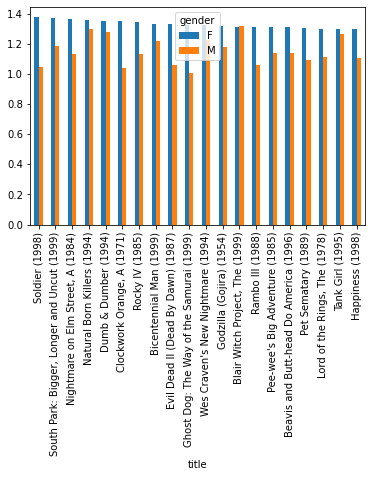

In [43]:
(mean_rating["std"].sort_values(by="F", ascending=False)[0:20]).plot(kind='bar')

In [44]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [45]:
titles = data["title"].values
years = np.zeros(len(titles), dtype=np.int32)

for i, title in enumerate(titles):
    years[i] = np.int32(title[-2:-6:-1][::-1])

In [46]:
years

array([1975, 1975, 1975, ..., 1999, 1973, 1998], dtype=int32)

In [47]:
data["years"] = years

In [48]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,years
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary,1998
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama,1998
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama,1999
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western,1973


In [49]:
mean_rating_year = data.pivot_table('rating', index='years', aggfunc=[len,np.mean,np.std])
mean_rating_year

,len,mean,std
,rating,rating,rating
years,,,
1919,45,3.466667,1.035725
1920,24,3.666667,1.307725
1921,62,3.790323,1.073329
1922,238,3.991597,1.098490
1923,17,3.117647,1.495090
...,...,...,...
1996,59382,3.388502,1.143700
1997,65402,3.411654,1.133725


<AxesSubplot:xlabel='years'>

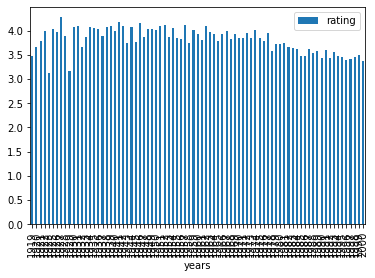

In [50]:
mean_rating_year['mean'].plot(kind="bar")

In [51]:
def title_to_year(title):
    return int(title[-2:-6:-1][::-1])

years = data["title"].apply(title_to_year)

In [52]:
years

0          1975
1          1975
2          1975
3          1975
4          1975
           ... 
1000204    1998
1000205    1998
1000206    1999
1000207    1973
1000208    1998
Name: title, Length: 1000209, dtype: int64